In [1]:
# IMPORTING BASIC LIBRARIES:
# Visualization and EDA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Class imbalance
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# ModelBuilding
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
# score
from sklearn.metrics import roc_auc_score


In [2]:
# Reading files
train = pd.read_csv("train_s3TEQDk.csv")
test = pd.read_csv("test_mSzZ8RL.csv")

In [3]:
train.shape,test.shape

((245725, 11), (105312, 10))

In [4]:
#ratio of null values in train data
train.isnull().sum()/train.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [5]:
#ratio of null values in test data
test.isnull().sum()/test.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

In [6]:
# Imputing missing values in 'Credit_Product' feature with a most occuring value
train.apply(lambda x:x.fillna(x.value_counts().index[0]))
test.apply(lambda x:x.fillna(x.value_counts().index[0]))

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,No,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes


EDA

In [7]:
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [8]:
test.describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


In [9]:
# Getting unique values for 'Gender' feature
print(list(test['Gender'].unique()))

['Male', 'Female']


In [10]:
# Getting unique values for 'Region_Code' feature
print(list(train['Region_Code'].unique()))

['RG268', 'RG277', 'RG270', 'RG282', 'RG261', 'RG265', 'RG283', 'RG254', 'RG269', 'RG257', 'RG279', 'RG280', 'RG252', 'RG284', 'RG259', 'RG281', 'RG258', 'RG266', 'RG260', 'RG274', 'RG256', 'RG275', 'RG273', 'RG267', 'RG272', 'RG251', 'RG262', 'RG264', 'RG278', 'RG276', 'RG263', 'RG250', 'RG255', 'RG253', 'RG271']


In [11]:
# Getting unique values for 'Region_Code' feature
print(list(test['Region_Code'].unique()))

['RG254', 'RG268', 'RG270', 'RG272', 'RG253', 'RG257', 'RG284', 'RG283', 'RG277', 'RG273', 'RG261', 'RG280', 'RG274', 'RG278', 'RG269', 'RG281', 'RG251', 'RG252', 'RG279', 'RG282', 'RG262', 'RG263', 'RG264', 'RG256', 'RG265', 'RG260', 'RG258', 'RG271', 'RG250', 'RG275', 'RG276', 'RG267', 'RG255', 'RG259', 'RG266']


In [12]:
# Getting unique values for 'Occupation' feature
print(list(test['Occupation'].unique()))

['Other', 'Salaried', 'Self_Employed', 'Entrepreneur']


In [13]:
# Getting unique values for 'Channel_Code' feature
print(list(test['Channel_Code'].unique()))

['X1', 'X2', 'X3', 'X4']


In [14]:
# Getting unique values for 'Credit_Product' feature
print(list(test['Credit_Product'].unique()))

['Yes', nan, 'No']


In [15]:
# Getting unique values for 'Is_Active' feature
print(list(test['Is_Active'].unique()))

['No', 'Yes']


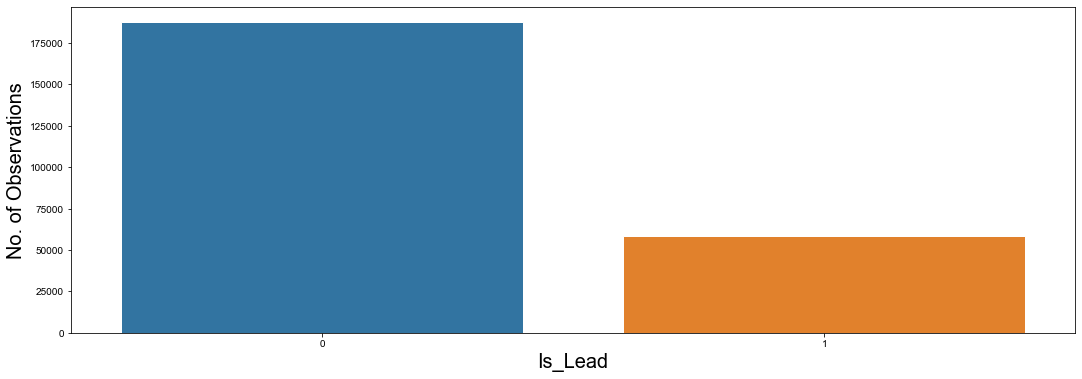

In [16]:
# Target class is imbalanced

ax = plt.subplots(figsize=(18, 6))
sns.set_style("whitegrid")
sns.countplot(x='Is_Lead', data=train);
plt.ylabel("No. of Observations", size=20);
plt.xlabel("Is_Lead", size=20);

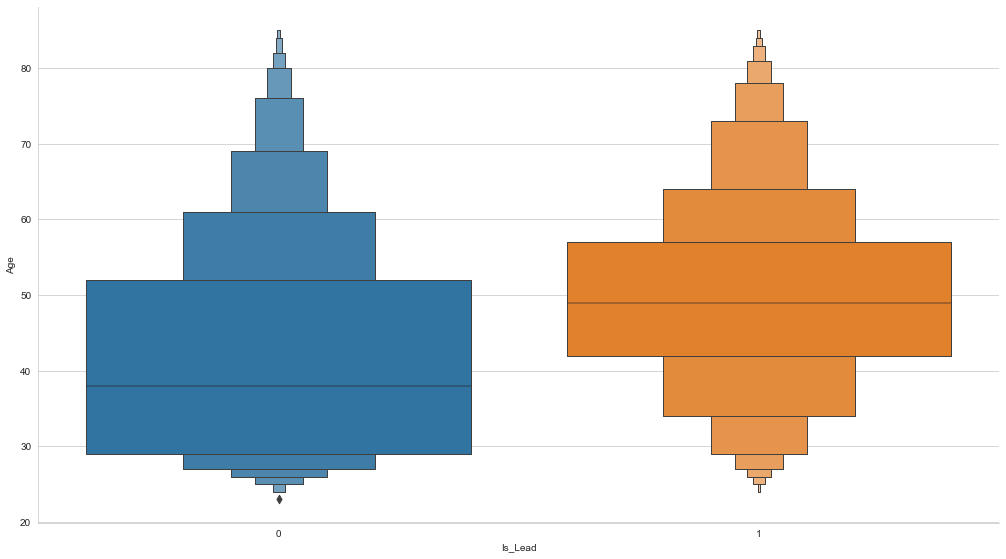

In [17]:
# Age feature
a = sns.catplot(x='Is_Lead', y='Age', kind='boxen', data=train);
a.fig.set_size_inches(15,8)
# Conclusion: People between age 50 to 65 tend to prefer credit card

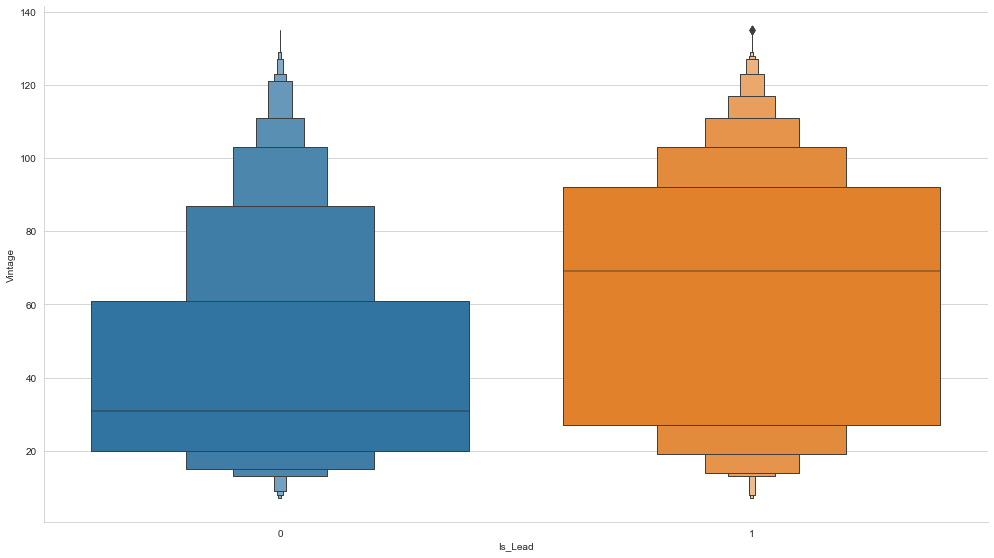

In [18]:
v = sns.catplot(x='Is_Lead', y='Vintage', kind='boxen', data=train);
v.fig.set_size_inches(15,8)
# Conclusion:People with vintage 60 to 100 tend to prefer credit card

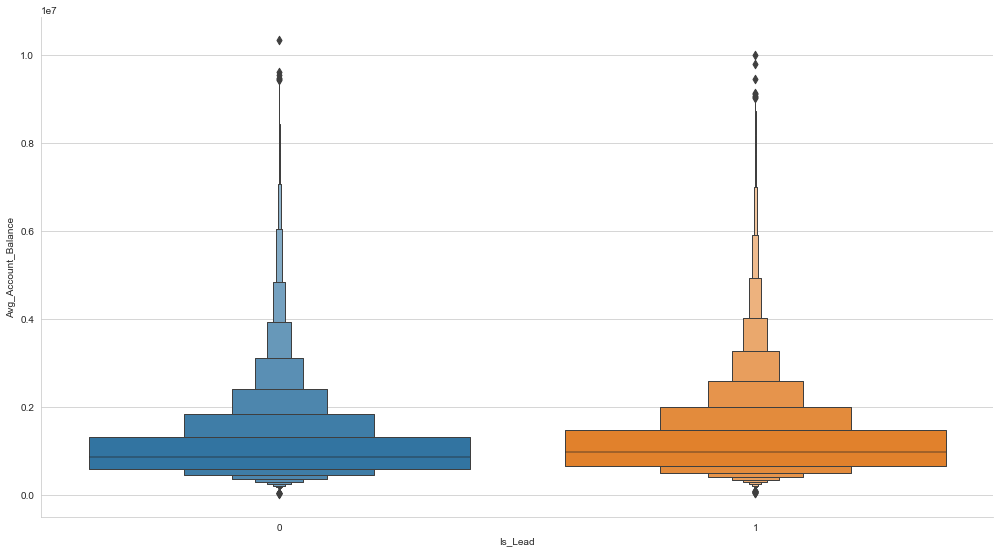

In [19]:
ia = sns.catplot(x='Is_Lead', y='Avg_Account_Balance', kind='boxen', data=train);
ia.fig.set_size_inches(15,8)
# Conclusion: This feature is not significant

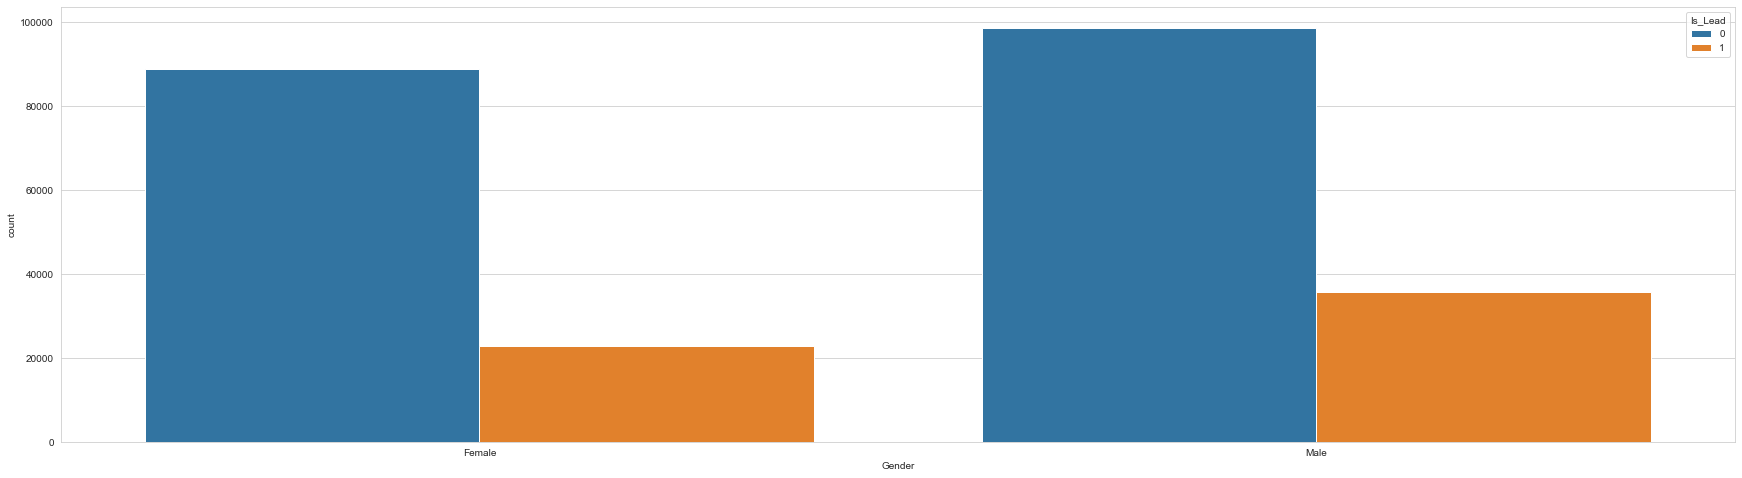

In [20]:
ax = plt.subplots(figsize=(30, 8))
sns.set_style("whitegrid")
sns.countplot(x='Gender', hue='Is_Lead', data=train);
# Conclusion: Not much information. We will one hot encode this feature

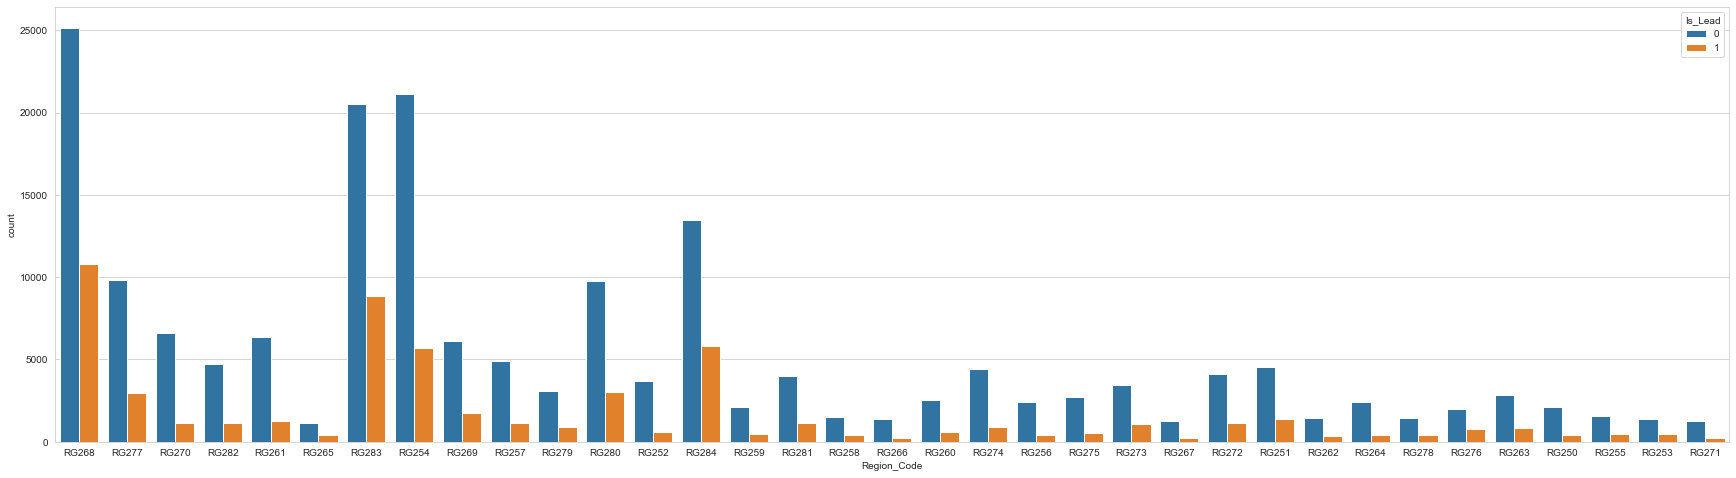

In [21]:
ax = plt.subplots(figsize=(30, 8))
sns.set_style("whitegrid")
sns.countplot(x='Region_Code', hue='Is_Lead', data=train);
# Conclusion: We will do mean/target encoding for this feature

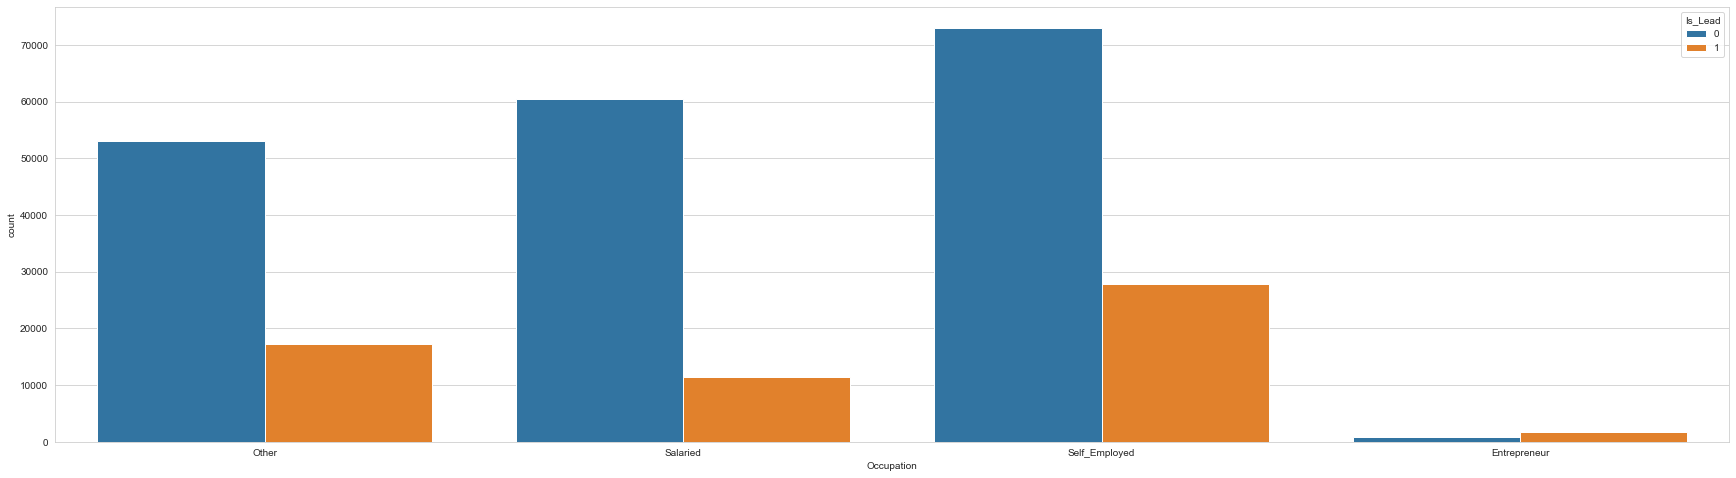

In [22]:
ax = plt.subplots(figsize=(30, 8))
sns.set_style("whitegrid")
sns.countplot(x='Occupation', hue='Is_Lead', data=train);
# We will try combining this feature with 'Channel_Code'

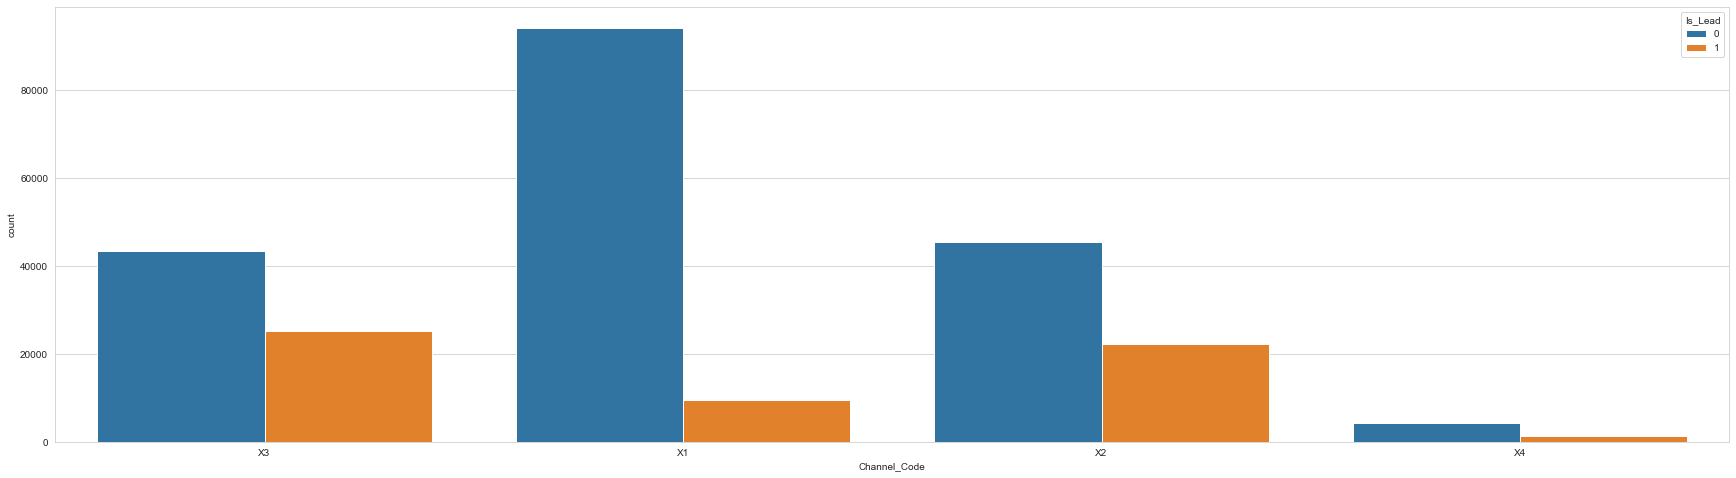

In [23]:
ax = plt.subplots(figsize=(30, 8))
sns.set_style("whitegrid")
sns.countplot(x='Channel_Code', hue='Is_Lead', data=train);
# We will try combining this feature with 'Occupation'

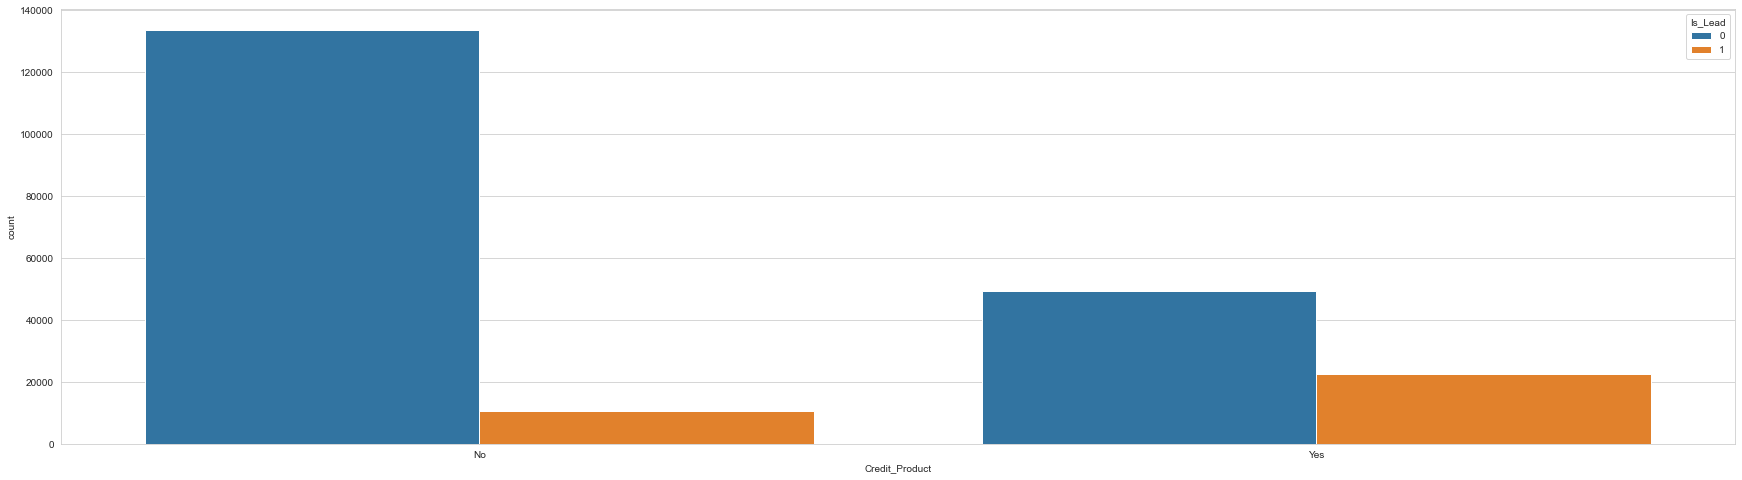

In [24]:
ax = plt.subplots(figsize=(30, 8))
sns.set_style("whitegrid")
sns.countplot(x='Credit_Product', hue='Is_Lead', data=train);
# We will do one hot encoding for this categorical feature

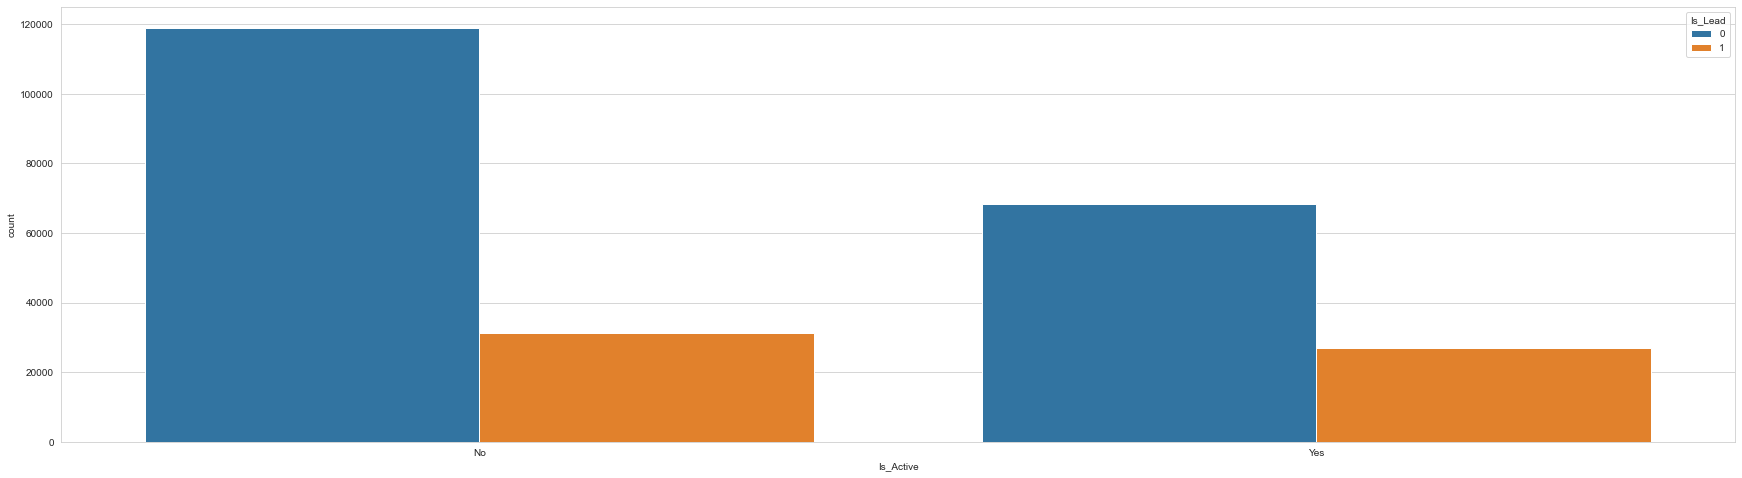

In [25]:
ax = plt.subplots(figsize=(30, 8))
sns.set_style("whitegrid")
sns.countplot(x='Is_Active', hue='Is_Lead', data=train);
# We will do one hot encoding for this categorical feature

FEATURE ENGINEERING


In [26]:
# Combine Occupation and Channel_Code feature and store in 'Occu_ChCode'
train['Occu_ChCode'] = train["Occupation"].astype(str) + '_' + train["Channel_Code"].astype(str)
test['Occu_ChCode'] = test["Occupation"].astype(str) + '_' + test["Channel_Code"].astype(str)

In [27]:
# Mean/target encoding for 'Occu_ChCode' and store in 'Combined'
#compute global mean
mean= train['Is_Lead'].mean()
# compute the number of values and the mean of each group
agg= train.groupby('Occu_ChCode')['Is_Lead'].agg(['count','mean'])
counts= agg['count']
means= agg['mean']
weight =1000
# compute smoothed means
smooth=(counts*means+weight*mean)/(counts+weight)
# Replace each value by smoothed mean
train.loc[: ,'Combined']= train['Occu_ChCode'].map(smooth)
test['Combined']= test['Occu_ChCode'].map(smooth)


In [28]:
# Mean/target encoding for 'Region_Code' and store in 'Region_COde_En'
#compute global mean
mean= train['Is_Lead'].mean()
# compute the number of values and the mean of each group
agg= train.groupby('Region_Code')['Is_Lead'].agg(['count','mean'])
counts= agg['count']
means= agg['mean']
weight =1000
# compute smoothed means

smooth=(counts*means+weight*mean)/(counts+weight)
# Replace each value by smoothed mean
train.loc[: ,'Region_COde_En']= train['Region_Code'].map(smooth)
test['Region_COde_En']= test['Region_Code'].map(smooth)


In [29]:
# age feature is numeric one. Age between 50 to 60 prefer credit card(from EDA). So we will set value 2 for this group and
# value 1 for rest and store in feature 'Age_En'
def label_age1(i):
    if (train['Age'][i]>=50 and train['Age'][i]<=65):
        return 2
    else:
        return 1
    
def label_age2(i):
    if (test['Age'][i]>=50 and test['Age'][i]<=65):
        return 2
    else:
        return 1 
    
age1=[]
for i in range(len(train)):
    age1.append(label_age1(i))
train['Age_En']= age1

age2=[]
for i in range(len(test)):
    age2.append(label_age2(i))
test['Age_En']= age2

In [30]:
# vintage feature is numeric one. Vintage between 60 to 100 prefer credit card(from EDA). So we will set value 2 for this group and
# value 1 for rest and store in feature 'Vintage_En'
def label_vin1(i):
    if (train['Vintage'][i]>=60 and train['Vintage'][i]<=100):
        return 2
    else:
        return 1
    
def label_vin2(i):
    if (test['Vintage'][i]>=60 and test['Vintage'][i]<=100):
        return 2
    else:
        return 1 
    
vin1=[]
for i in range(len(train)):
    vin1.append(label_vin1(i))
train['Vintage_En']= vin1

vin2=[]
for i in range(len(test)):
    vin2.append(label_vin2(i))
test['Vintage_En']= vin2

In [31]:
# One- hot encoding for Gender feature
train= pd.get_dummies(train,prefix=['Gender'],columns=['Gender'])
test= pd.get_dummies(test,prefix=['Gender'],columns=['Gender'])

In [32]:
# One- hot encoding for Credit_Product feature
train= pd.get_dummies(train,prefix=['Product'],columns=['Credit_Product'])
test= pd.get_dummies(test,prefix=['Product'],columns=['Credit_Product'])


In [33]:
# One- hot encoding for Is_Active feature
train= pd.get_dummies(train,prefix=['Active'],columns=['Is_Active'])
test= pd.get_dummies(test,prefix=['Active'],columns=['Is_Active'])

In [34]:
y= train['Is_Lead']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Is_Lead, dtype: int64

In [35]:
# Dropping unneccesary features from train and test data
train.drop(['ID','Age','Region_Code','Occupation','Channel_Code','Vintage','Avg_Account_Balance','Occu_ChCode','Is_Lead'],axis=1,inplace= True)
test.drop(['ID','Age','Region_Code','Occupation','Channel_Code','Vintage','Avg_Account_Balance','Occu_ChCode'],axis=1,inplace= True)

cross validation, model building, learning curves


In [36]:
train.shape, test.shape

((245725, 10), (105312, 10))

In [37]:
# X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.2, random_state=3)

In [38]:
oversample = SMOTE()
# X, Y = oversample.fit_resample(X_train, y_train)

In [39]:
# X.shape, Y.shape

NameError: name 'X' is not defined

In [45]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score

def cross_val(X, y, model, params, folds=9):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        x_train, y_train = oversample.fit_resample(x_train, y_train)

        alg = model(**params)
        alg.fit(x_train, y_train,
                eval_set=[(x_test, y_test)],
                early_stopping_rounds=100,
                verbose=400)

        pred = alg.predict_proba(x_test)[:, 1]
        roc_score = roc_auc_score(y_test, pred)
        print(f"roc_auc_score: {roc_score}")
        print("-"*50)
    
    return alg

In [46]:
lgb_params= {'learning_rate': 0.045, 
             'n_estimators': 20000, 
             'max_bin': 94,
             'num_leaves': 10, 
             'max_depth': 27, 
             'reg_alpha': 8.457, 
             'reg_lambda': 6.853, 
             'subsample': 0.749}

from lightgbm import LGBMClassifier
lgb_model = cross_val(train, y, LGBMClassifier, lgb_params)

Fold: 0
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.425955
[800]	valid_0's binary_logloss: 0.422073
[1200]	valid_0's binary_logloss: 0.420278
[1600]	valid_0's binary_logloss: 0.419449
[2000]	valid_0's binary_logloss: 0.419008
[2400]	valid_0's binary_logloss: 0.418741
Early stopping, best iteration is:
[2666]	valid_0's binary_logloss: 0.418621
roc_auc_score: 0.8680625469747498
--------------------------------------------------
Fold: 1
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.431614
[800]	valid_0's binary_logloss: 0.428284
[1200]	valid_0's binary_logloss: 0.42677
[1600]	valid_0's binary_logloss: 0.426187
[2000]	valid_0's binary_logloss: 0.425876
[2400]	valid_0's binary_logloss: 0.425673
Early stopping, best iteration is:
[2603]	valid_0's binary_logloss: 0.425628
roc_auc_score: 0.8615123766000404
--------------------------------------------------
Fold: 2
Training until validation sco

In [47]:
xgb_params= {'n_estimators': 20000, 
             'max_depth': 6, 
             'learning_rate': 0.0201, 
             'reg_lambda': 29.326, 
             'subsample': 0.818, 
             'colsample_bytree': 0.235, 
             'colsample_bynode': 0.820, 
             'colsample_bylevel': 0.453}
from xgboost import XGBClassifier
xgb_model = cross_val(train,y, XGBClassifier, xgb_params)

Fold: 0
[14:10:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.69170
[400]	validation_0-logloss:0.50595
[800]	validation_0-logloss:0.46705
[1200]	validation_0-logloss:0.45294
[1600]	validation_0-logloss:0.44335
[2000]	validation_0-logloss:0.43916
[2400]	validation_0-logloss:0.43651
[2800]	validation_0-logloss:0.43412
[3200]	validation_0-logloss:0.43279
[3600]	validation_0-logloss:0.43142
[4000]	validation_0-logloss:0.43050
[4400]	validation_0-logloss:0.42942
[4800]	validation_0-logloss:0.42866
[5200]	validation_0-logloss:0.42809
[5600]	validation_0-logloss:0.42733
[5878]	validation_0-logloss:0.42700
roc_auc_score: 0.8681733119629331
--------------------------------------------------
Fold: 1
[14:18:55] WARNING

In [48]:
cat_params= {'n_estimators': 20000, 
                  'depth': 4, 
                  'learning_rate': 0.023, 
                  'colsample_bylevel': 0.655, 
                  'bagging_temperature': 0.921, 
                  'l2_leaf_reg': 10.133}
from catboost import CatBoostClassifier
cat_model = cross_val(train, y, CatBoostClassifier, cat_params)

Fold: 0
0:	learn: 0.6807430	test: 0.6814329	best: 0.6814329 (0)	total: 212ms	remaining: 1h 10m 44s
400:	learn: 0.4405667	test: 0.4322487	best: 0.4322487 (400)	total: 16.8s	remaining: 13m 39s
800:	learn: 0.4308399	test: 0.4263908	best: 0.4263908 (800)	total: 34.3s	remaining: 13m 42s
1200:	learn: 0.4235988	test: 0.4220731	best: 0.4220731 (1200)	total: 53.1s	remaining: 13m 50s
1600:	learn: 0.4190689	test: 0.4194606	best: 0.4194606 (1600)	total: 1m 11s	remaining: 13m 39s
2000:	learn: 0.4162225	test: 0.4178167	best: 0.4178167 (2000)	total: 1m 29s	remaining: 13m 22s
2400:	learn: 0.4143094	test: 0.4166597	best: 0.4166597 (2400)	total: 1m 47s	remaining: 13m 4s
2800:	learn: 0.4130618	test: 0.4160230	best: 0.4160230 (2800)	total: 2m 4s	remaining: 12m 46s
3200:	learn: 0.4121362	test: 0.4155609	best: 0.4155609 (3200)	total: 2m 22s	remaining: 12m 27s
3600:	learn: 0.4114572	test: 0.4152868	best: 0.4152868 (3600)	total: 2m 40s	remaining: 12m 11s
4000:	learn: 0.4108767	test: 0.4150591	best: 0.4150591 

In [49]:
# predictions on test/unseen data
pred_unseen_lgb = lgb_model.predict_proba(test)[:,1]
pred_unseen_xgb = xgb_model.predict_proba(test)[:,1]
pred_unseen_cat = cat_model.predict_proba(test)[:,1]
prediction_unseen1 = (pred_unseen_lgb + pred_unseen_cat+pred_unseen_xgb)/3

In [50]:
submission= pd.read_csv("sample_submission_eyYijxG.csv")

In [51]:
submission['Is_Lead'] = prediction_unseen1
submission.to_csv(f'submission.csv',index=False)